In [13]:

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
import pickle

In [14]:
#Xu ly data
data1 = pd.read_csv("cauhoi_cautraloi_nganh.csv")
data2 = pd.read_csv("cauhoi_cautraloi_hocphi_hocbong.csv")
data = pd.concat([data1, data2], axis=0)
data = data.drop("stt",axis=1)
responses = {}
for index, row in data.iterrows():
    # In ra index và dữ liệu của từng dòng
    responses[row[2]] = row[1]
print(data)

C:\Users\thanh\AppData\Local\Temp\ipykernel_12180\328348989.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  responses[row[2]] = row[1]


                                          cauhoi  \
0                                bảo hộ lao động   
1                   Ngành bảo hộ lao động là gì?   
2            Thông tin về ngành bảo hộ lao động?   
3           Giới thiệu về ngành bảo hộ lao động?   
4            Kỹ sư ngành bảo hộ lao động làm gì?   
...                                          ...   
1738                         chi phí trung bình    
1739                chi phí trung bình 4 năm học   
1740               chi phí trung bình qua 4 năm    
1741               chi phí trung bình các ngành    
1742  chi phí trung bình ngành khoa học máy tính   

                                              cautraloi  \
0     Bảo hộ lao động là ngành học đón đầu xu hướng ...   
1     Bảo hộ lao động là ngành học đón đầu xu hướng ...   
2     Bảo hộ lao động là ngành học đón đầu xu hướng ...   
3     Bảo hộ lao động là ngành học đón đầu xu hướng ...   
4     Kỹ sư bảo hộ lao động có thể tự tin ứng tuyển ...   
...                  

In [15]:
print(data.isnull().sum())

cauhoi       0
cautraloi    0
tags         0
dtype: int64


In [16]:
data = data.sample(frac=1)

In [17]:
import string
#remove punctuations
data['cauhoi'] = data['cauhoi'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['cauhoi'] = data['cauhoi'].apply(lambda wrd: ''.join(wrd))


In [18]:
data['cauhoi']

535                           chương trình hệ tiêu chuẩn 
325     không biết là ngành thiết kế đồ họa chương trì...
403                   học ngành kỹ thuật phần mềm làm gì 
74                                     công nghệ sinh học
1081    không biết là ngành kinh doanh quốc tế thuộc k...
                              ...                        
186           bằng cấp chuyên ngành kế toán hệ tiêu chuẩn
768     tôi muốn hỏi ngành kỹ thuật xây dựng công trìn...
1659    cho tôi hỏi là có học bổng dành cho chương trì...
522     cho em hỏi học phí chương trình tiêu chuẩn của...
959     dạ cho em hỏi là học phí của chương trình tiêu...
Name: cauhoi, Length: 2643, dtype: object

In [19]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(data['cauhoi'])
train = tokenizer.texts_to_sequences(data['cauhoi'])

X_train = pad_sequences(train)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])


In [20]:
X_train

array([[  0,   0,   0, ...,  52,  12,   9],
       [  0,   0,   0, ...,   3,   8,  10],
       [  0,   0,   0, ...,  93, 149,  37],
       ...,
       [  0,   0,   0, ...,  73,  62,  22],
       [  0,   0,   0, ...,   3,   8,  10],
       [  0,   0,   0, ...,   3,   8,  10]])

In [21]:
y_train

array([ 84, 157, 167, ...,  12, 157, 157])

In [22]:
input_shape =  X_train.shape[1]
print(X_train.shape)
print(input_shape)

(2643, 36)
36


In [23]:
#vocab là các từ trong bộ dữ liệu và output_length là số lượng tag
vocabulary = len(tokenizer.word_index)
print("number of unique words: ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

number of unique words:  320
output length:  385


In [24]:
#Create model and train with epochs = 50
i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(32, return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length, activation="softmax")(x)
model = Model(i,x)

In [25]:
model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])

#train model
train = model.fit(X_train,y_train,epochs=50)


Epoch 1/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.2501 - loss: 5.0822
Epoch 2/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.2984 - loss: 3.5998
Epoch 3/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3890 - loss: 2.9788
Epoch 4/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.4764 - loss: 2.5074
Epoch 5/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5088 - loss: 2.1696
Epoch 6/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.5992 - loss: 1.7700
Epoch 7/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6024 - loss: 1.6514
Epoch 8/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6561 - loss: 1.3848
Epoch 9/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6978 - loss: 1.1889
Epoch 10/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7474 - loss: 1.0160
Epoch 11/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.7731 - loss: 0.8935
Epoch 12/50
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy:

In [26]:
#Create model and train with epochs=100
i1 = Input(shape=(input_shape,))
x1 = Embedding(vocabulary+1,10)(i1)
x1 = LSTM(32, return_sequences=True)(x1)
x1 = Flatten()(x1)
x1 = Dense(output_length, activation="softmax")(x1)
model1 = Model(i1,x1)
model1.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#train model
train1 = model1.fit(X_train,y_train,epochs=100)

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2359 - loss: 5.0757
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3682 - loss: 3.3764
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4044 - loss: 2.9074
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4544 - loss: 2.5859
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4796 - loss: 2.3371
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5229 - loss: 2.0680
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5685 - loss: 1.7983
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6303 - loss: 1.5272
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6791 - loss: 1.2835
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7213 - loss: 1.0831
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - accuracy: 0.7499 - loss: 0.9513
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step

In [27]:
#Create model and train with epochs=250
i2 = Input(shape=(input_shape,))
x2 = Embedding(vocabulary+1,32)(i2)
x2 = LSTM(32, return_sequences=True)(x2)
x2 = Flatten()(x2)
x2 = Dense(output_length, activation="softmax")(x2)
model2 = Model(i2,x2)
model2.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
#train model
train2 = model2.fit(X_train,y_train,epochs=200)

Epoch 1/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.2909 - loss: 4.9074
Epoch 2/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.3970 - loss: 3.0788
Epoch 3/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.4587 - loss: 2.5842
Epoch 4/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5482 - loss: 2.0580
Epoch 5/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6204 - loss: 1.6967
Epoch 6/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.6686 - loss: 1.3849
Epoch 7/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7298 - loss: 1.0932
Epoch 8/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7736 - loss: 0.9269
Epoch 9/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.8108 - loss: 0.7320
Epoch 10/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.8591 - loss: 0.5756
Epoch 11/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8928 - loss: 0.4538
Epoch 12/200
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step

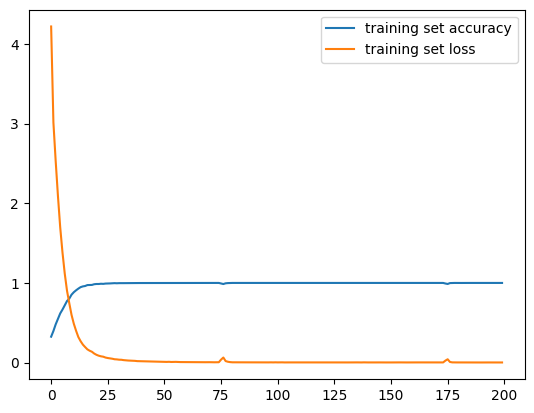

In [28]:
#Accuracy of the model
plt.plot(train2.history['accuracy'], label='training set accuracy')
plt.plot(train2.history['loss'],label='training set loss')
plt.legend()

In [29]:
model2.save('model_QA.keras')

In [30]:
with open("variable.pkl", "wb") as f:
    # Ghi dữ liệu
    pickle.dump(tokenizer, f)
    pickle.dump(le, f)
    pickle.dump(responses, f)
    pickle.dump(input_shape, f)
    pickle.dump(vocabulary, f)
    pickle.dump(output_length, f)

In [31]:
# pip install underthesea